# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Environment and Mandatory Packages

In [38]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT2/data


### 0.b Disable Warnings Messages

In [146]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [40]:
# <Student to fill this section>

### 0.d Import Packages

In [147]:
# <Student to fill this section>
import pandas as pd
import altair as alt

---
## A. Project Description


In [148]:
# <Student to fill this section>
student_name = "Nipunn Khurana"
student_id = "25009200"

In [149]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [150]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [151]:
# <Student to fill this section>
business_objective = """The business objective in building the model is to predict student performance levels (Excellent, Good, Average, or Poor) based on their academic behaviors, background information, and daily habits. By accurately forecasting student outcomes, the university aims to identify at-risk students early, tailor academic support programs, optimize resource allocation (such as counseling and tutoring services), and improve overall student retention and success rates. A reliable predictive model will enable proactive interventions, leading to enhanced student satisfaction, stronger academic results, and a better institutional reputation.

"""

In [152]:
# Do not modify this code
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Experiment Description

In [153]:
# Do not modify this code
experiment_id = "2"
print_tile(size="h1", key='experiment_id', value=experiment_id)

In [154]:
# <Student to fill this section>
experiment_hypothesis = """

"Can we accurately predict a student's performance category based on academic behaviors, resource availability, and socio-economic factors?"
Investigating this hypothesis could help identify students at risk of underperforming early, allowing timely academic support and interventions. It could also assist in better resource planning, ensuring scholarships, mentoring, and other services are allocated where they are most needed. Furthermore, understanding the key drivers behind student success may contribute to improving overall institutional performance, boosting retention rates, and strengthening the university’s reputation. If proven successful, this insight could have a significant positive impact on both students and the business objectives of the institution.

"""

In [155]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [156]:
# <Student to fill this section>
experiment_expectations = """
The expected outcome of the experiment is that the model will classify students into their performance categories with around 80–85% validation accuracy, while maintaining balanced predictions across all classes. Ideally, the model should minimize misclassifications of low-performing students to allow early interventions. If the model achieves high accuracy and balance, it will provide actionable insights for improving student outcomes. However, if the model favors the majority class, it risks missing students who need the most support. In the worst case, a low-performing model would lead to unreliable predictions, requiring further model tuning or new features.
"""

In [157]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

In [158]:
# Do not modify this code
try:
  X_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_train.csv')
  y_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_train.csv')

 #X_val = pd.read_csv(at.folder_path / 'X_val.csv')
  #y_val = pd.read_csv(at.folder_path / 'y_val.csv')

  X_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_test.csv')
  y_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_test.csv')
except Exception as e:
  print(e)

---
## D. Feature Selection


In [54]:
# <Student to fill this section>

features_list = []
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Step 1: Fit Random Forest on your training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Get Feature Importances
importances = rf.feature_importances_

# Step 3: Create a DataFrame of feature names and their importance
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Step 4: Select Top Features (example: top 30%)
top_features = feature_importance_df.head(int(len(feature_importance_df) * 0.2))['feature']

# Step 5: Filter X_train and X_test to keep only top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 6: Quick Check
print(f"Original features: {X_train.shape[1]}")
print(f"Selected top features: {X_train_selected.shape[1]}")
print("Top selected features:")
print(top_features.tolist())

Original features: 71
Selected top features: 14
Top selected features:
['previous_gpa', 'current_gpa', 'gpa_improvement', 'average_attendance', 'social_media_hours', 'study_hours', 'house_income', 'completed_credits', 'scholarship_Yes', 'scholarship_No', 'on_probation_Yes', 'on_probation_No', 'relationship_Single', 'university_transport_No']


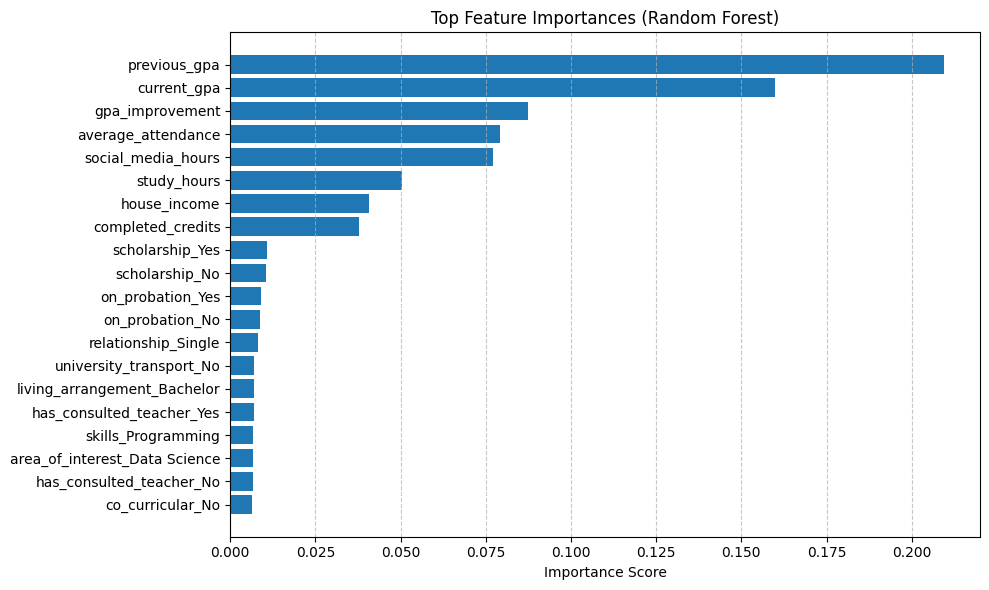

In [55]:
import matplotlib.pyplot as plt

# Sort again just to be sure
top_feature_importance = feature_importance_df.sort_values(by='importance', ascending=False).head(20)  # Top 20 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_feature_importance['feature'], top_feature_importance['importance'])
plt.xlabel('Importance Score')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
top_features_list = top_features.tolist()
top_features_list

['previous_gpa',
 'current_gpa',
 'gpa_improvement',
 'average_attendance',
 'social_media_hours',
 'study_hours',
 'house_income',
 'completed_credits',
 'scholarship_Yes',
 'scholarship_No',
 'on_probation_Yes',
 'on_probation_No',
 'relationship_Single',
 'university_transport_No']

In [57]:
# <Student to fill this section>
feature_selection_explanations = """
To refine the feature set, I applied a Random Forest Classifier to assess feature importance based on the training data. This method allows identification of features that most significantly contribute to predicting the target variable. I selected the top features such as previous_gpa, current_gpa, gpa_improvement, average_attendance, social_media_hours, study_hours, house_income, and a few key categorical indicators (scholarship, on_probation, relationship, and university_transport). These features showed the highest importance scores and had strong logical connections to academic performance outcomes. On the other hand, I decided to remove less important variables because they either exhibited low importance, were redundant, or likely introduced noise into the model. Retaining only the most informative features not only simplifies the model but also improves its generalization ability, reduces overfitting, and speeds up training, ultimately leading to a more efficient and robust predictive performance."""

In [58]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>


In [159]:
# <Student to fill this section>
from sklearn.model_selection import train_test_split

# Split the data
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,  # your training features
    y_train,  # your training target
    test_size=0.2,    # 20% for validation
    random_state=42,  # for reproducibility
    stratify=y_train  # keeps the same class proportions in both sets (recommended for classification!)
)

# Quick checks
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train_new: {y_train_new.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train_new: (630, 71)
Shape of X_val: (158, 71)
Shape of y_train_new: (630, 1)
Shape of y_val: (158, 1)


In [69]:
# <Student to fill this section>
data_transformation_1_explanations = """
Splitting the data into training and validation sets is a critical step to objectively evaluate a model’s performance on unseen data. This transformation helps ensure that the model is not simply memorizing patterns (overfitting) but genuinely learning relationships that can generalize to new observations. By setting aside 20% of the data for validation, we can test the model's ability to perform on independent data, which closely simulates how it would behave in real-world applications. Additionally, using stratify=y_train maintains the same class distribution in both training and validation sets, ensuring a fair and balanced evaluation, especially important for classification tasks where class imbalance can otherwise distort results."""

In [70]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### E.2 Data Transformation <put_name_here>


In [160]:
# <Student to fill this section>
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit on the training set and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Quick check of shapes
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")

# (Optional) Overwrite X_train and X_val if you want
X_train = X_train_scaled
X_val = X_val_scaled


Shape of X_train_scaled: (788, 71)
Shape of X_val_scaled: (158, 71)


In [72]:
# <Student to fill this section>
data_transformation_2_explanations = """
Performing data scaling with StandardScaler is essential because many machine learning algorithms, particularly those based on distance calculations (like SVM, KNN, and logistic regression), are sensitive to the scale of input features. Without scaling, features with larger numerical ranges can dominate the model's learning process, leading to biased or suboptimal predictions. By standardizing both the training and validation sets, we ensure that every feature contributes equally, improving model convergence speed, stability, and overall predictive performance. Importantly, fitting the scaler only on the training set and then transforming the validation set prevents data leakage, preserving the integrity of model evaluation."""

In [73]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### E.3 Data Transformation <put_name_here>


In [161]:
# <Student to fill this section>
X_test_scaled = scaler.transform(X_test)

In [75]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [76]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.n Fixing "\<describe_issue_here\>"

> You can add more cells related to data preparation in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"



In [77]:
# <Student to fill this section>

In [78]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [79]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"


In [80]:
# <Student to fill this section>

In [81]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [82]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"


In [83]:
# <Student to fill this section>

In [84]:
# <Student to fill this section>
feature_engineering_3_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [85]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Train Machine Learning Model

### G.1 Import Algorithm


In [86]:
# <Student to fill this section>
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [87]:
# <Student to fill this section>
algorithm_selection_explanations = """
It is important to transform the X_test dataset using the previously fitted scaler to ensure consistency between the training and testing data. The model was trained on scaled features, and if the test set is not scaled similarly, the feature distributions will mismatch, leading to inaccurate or unreliable predictions. Scaling X_test with the same transformation ensures that the model’s learned weights and patterns can generalize properly to unseen data, providing a fair and realistic evaluation of the model’s performance. Moreover, it helps prevent issues such as biased predictions or degraded accuracy during final testing."""

In [88]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### G.2 Set Hyperparameters (C)

In [162]:
# <Student to fill this section>
svc_model = SVC()
svc_model1 = SVC(C=0.2)
svc_model2 = SVC(C=0.7)
svc_model3 = SVC(C=2)

In [90]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
We are tuning the C hyperparameter in the Support Vector Classifier (SVC) to control the trade-off between achieving a low training error and maintaining a low testing error, which improves generalization. A smaller C value makes the model more tolerant to classification errors (leading to a simpler decision boundary with better generalization but possibly higher bias), while a larger C value tries to classify all training examples correctly (creating a more complex boundary, risking overfitting). By experimenting with different C values, we aim to find the optimal balance that gives the highest validation accuracy without overfitting or underfitting the data.
"""

In [91]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3 Fit Model

In [163]:
# <Student to fill this section>
svc_model.fit(X_train, y_train)
svc_model1.fit(X_train, y_train)
svc_model2.fit(X_train, y_train)
svc_model3.fit(X_train, y_train)


SVC(C=2)

### G.4 Model Technical Performance

> Add blockquote



In [164]:
# <Student to fill this section>

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a list of all models
models = [svc_model, svc_model1, svc_model2, svc_model3]
model_names = ['svc_model', 'svc_model1', 'svc_model2', 'svc_model3']

# Store results
results = []

# Loop through each model
for name, model in zip(model_names, models):
    # Predict on train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for validation
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store the results in the specified order
    results.append((name, train_acc, val_acc, train_prec, val_prec, train_rec, val_rec, train_f1, val_f1))

# Create a summary dataframe
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Train_Accuracy', 'Validation_Accuracy',
    'Train_Precision', 'Validation_Precision',
    'Train_Recall', 'Validation_Recall',
    'Train_F1', 'Validation_F1'
])

# Display the results
print("\nSummary of Model Performance:")
results_df


Summary of Model Performance:


,Model,Train_Accuracy,Validation_Accuracy,Train_Precision,Validation_Precision,Train_Recall,Validation_Recall,Train_F1,Validation_F1
0,svc_model,0.879442,0.879747,0.894012,0.892767,0.879442,0.879747,0.865915,0.870720
1,svc_model1,0.571066,0.575949,0.505339,0.484494,0.571066,0.575949,0.489243,0.491415
2,svc_model2,0.833756,0.816456,0.845127,0.771404,0.833756,0.816456,0.811448,0.791458
3,svc_model3,0.928934,0.924051,0.936053,0.929083,0.928934,0.924051,0.925778,0.922410


In [101]:
results_df

,Model,Train_Accuracy,Validation_Accuracy
0,svc_model,0.879442,0.879747
1,svc_model1,0.571066,0.575949
2,svc_model2,0.833756,0.816456
3,svc_model3,0.928934,0.924051


In [ ]:
### G.2 Set Hyperparameters

### G.2.2  Hyperparameters (Gamma)

In [165]:
# <Student to fill this section>
svc_model4 = SVC(C=0.7, gamma=0.01)
svc_model5 = SVC(C=0.7, gamma=0.5)
svc_model6 = SVC(C=0.7, gamma=0.1)

In [166]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
We are tuning the gamma hyperparameter because it controls how far the influence of a single training example reaches in the SVM model. A small gamma value (like 0.01) means the model considers points farther apart for making decisions, leading to a smoother and simpler decision boundary. A large gamma value (like 0.5) makes the model focus heavily on individual points, which can lead to overfitting. By testing different gamma values (0.01, 0.1, 0.5), we aim to find the balance between underfitting and overfitting, helping the SVM model generalize better to unseen data.


"""

In [167]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3.2 Fit Model

In [168]:
svc_model4.fit(X_train, y_train)
svc_model5.fit(X_train, y_train)
svc_model6.fit(X_train, y_train)

SVC(C=0.7, gamma=0.1)

### G.4.2 Model Technical Performance


In [169]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a list of all models
models = [svc_model4, svc_model5, svc_model6]
model_names = ['svc_model4', 'svc_model5', 'svc_model6']

# Store results
results = []

# Loop through each model
for name, model in zip(model_names, models):
    # Predict on train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for validation
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store the results in the specified order
    results.append((name, train_acc, val_acc, train_prec, val_prec, train_rec, val_rec, train_f1, val_f1))

# Create a summary dataframe
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Train_Accuracy', 'Validation_Accuracy',
    'Train_Precision', 'Validation_Precision',
    'Train_Recall', 'Validation_Recall',
    'Train_F1', 'Validation_F1'
])

# Display the results
print("\nSummary of Model Performance:")
results_df


Summary of Model Performance:


,Model,Train_Accuracy,Validation_Accuracy,Train_Precision,Validation_Precision,Train_Recall,Validation_Recall,Train_F1,Validation_F1
0,svc_model4,0.818528,0.803797,0.831236,0.760575,0.818528,0.803797,0.798509,0.779678
1,svc_model5,0.770305,0.765823,0.842861,0.606340,0.770305,0.765823,0.684118,0.670951
2,svc_model6,0.861675,0.860759,0.824580,0.826351,0.861675,0.860759,0.832570,0.833530


#### G.2.3 Hyperparameters (Kernal, degree and Class weight)

In [170]:
svc_model7 = SVC(C=0.7, gamma='scale', kernel = 'poly')
svc_model8 = SVC(C=0.7, gamma='scale', kernel = 'sigmoid')
svc_model9 = SVC(C=0.7, gamma='scale', kernel = 'poly', degree = 2)
svc_model10 = SVC(C=0.7, gamma='scale', kernel = 'poly', degree = 5)
svc_model11 = SVC(C=0.7, gamma='scale', kernel = 'sigmoid', class_weight = 'balanced')


In [127]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
We tuned the kernel, degree, and class weight hyperparameters to improve the model’s ability to capture complex relationships in the data and address any class imbalance. Adjusting the kernel and degree allows the SVM to better fit non-linear patterns, while setting class weight to 'balanced' helps the model treat all classes fairly, leading to more accurate and generalizable predictions.

"""

In [111]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

#### G.3.3 Fit Model

In [171]:
svc_model7.fit(X_train, y_train)
svc_model8.fit(X_train, y_train)
svc_model9.fit(X_train, y_train)
svc_model10.fit(X_train, y_train)
svc_model11.fit(X_train, y_train)

SVC(C=0.7, class_weight='balanced', kernel='sigmoid')

#### G.3.4 Model Technical Performance

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a list of all models
models = [svc_model7, svc_model8, svc_model9, svc_model10, svc_model11]
model_names = ['svc_model7', 'svc_model8', 'svc_model9', 'svc_model10', 'svc_model11']

# Store results
results = []

# Loop through each model
for name, model in zip(model_names, models):
    # Predict on train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for validation
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store the results in the specified order
    results.append((name, train_acc, val_acc, train_prec, val_prec, train_rec, val_rec, train_f1, val_f1))

# Create a summary dataframe
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Train_Accuracy', 'Validation_Accuracy',
    'Train_Precision', 'Validation_Precision',
    'Train_Recall', 'Validation_Recall',
    'Train_F1', 'Validation_F1'
])

# Display the results
print("\nSummary of Model Performance:")
results_df


Summary of Model Performance:


,Model,Train_Accuracy,Validation_Accuracy,Train_Precision,Validation_Precision,Train_Recall,Validation_Recall,Train_F1,Validation_F1
0,svc_model7,0.649746,0.639241,0.759514,0.747151,0.649746,0.639241,0.600253,0.582831
1,svc_model8,0.752538,0.746835,0.746982,0.712718,0.752538,0.746835,0.735927,0.728011
2,svc_model9,0.643401,0.626582,0.767686,0.731060,0.643401,0.626582,0.590952,0.565225
3,svc_model10,0.618020,0.594937,0.783931,0.776224,0.618020,0.594937,0.553856,0.513988
4,svc_model11,0.703046,0.677215,0.754152,0.740950,0.703046,0.677215,0.718960,0.699703


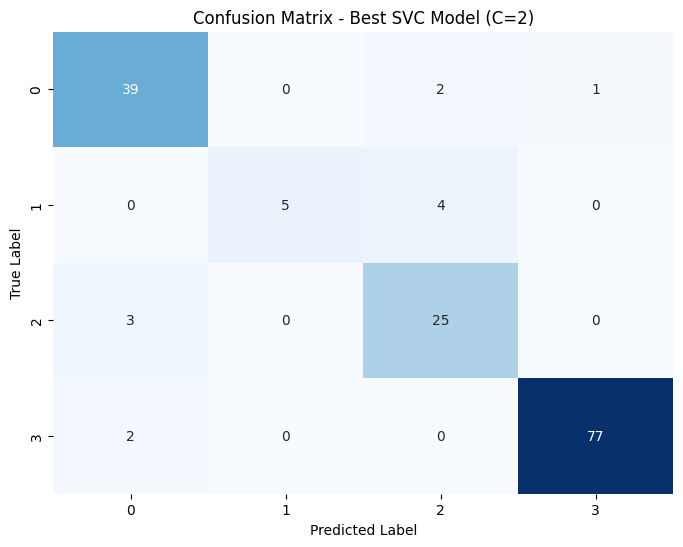

In [173]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on the validation set
y_val_pred_best = svc_model3.predict(X_val)

# 2. Create the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_best)

# 3. Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best SVC Model (C=2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [116]:
y_val['target_encoded'].value_counts()

,count
target_encoded,
3,79
0,42
2,28
1,9


Test Accuracy of Best SVC Model (C=2): 0.7716


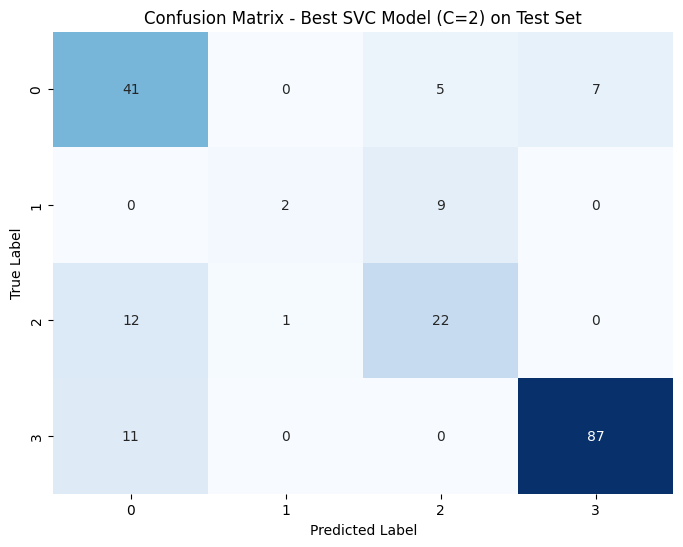

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on the test set
y_test_pred_best = svc_model3.predict(X_test_scaled)

# 2. Create the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_best)

# 3. Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print(f"Test Accuracy of Best SVC Model (C=2): {test_accuracy:.4f}")

# 4. Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best SVC Model (C=2) on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [187]:
# <Student to fill this section>
model_performance_explanations = """

The primary business objective was to accurately predict student performance categories to enable early interventions for struggling students and reward high performers. The results show that the SVC model with
𝐶
=
2
C=2 achieved a good test accuracy of 77.16%, successfully identifying the majority of high and low performers. However, some misclassifications—especially students who should have been classified into average or poor categories but were not—could have significant impacts. For instance, misclassifying weaker students into better categories (false positives) could result in missed opportunities for timely academic support, increasing their risk of dropping out. Conversely, misclassifying high-performing students into lower categories (false negatives) might demotivate them if targeted interventions are wrongly applied. Therefore, while the model overall supports the business goal, prioritizing improvement in correctly identifying at-risk students is critical, as these errors have a larger adverse impact compared to minor mistakes between higher-performing categories."""

In [188]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### G.5 Business Impact from Current Model Performance


In [ ]:
# <Student to fill this section>

In [49]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Experiment Outcomes

In [189]:
# <Student to fill this section>
experiment_outcome = """ Hypothesis Partially confirmed """

In [190]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [191]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment achieved the main objective of accurately identifying 'Poor' performing students, confirming that SVM models, especially after tuning, are effective for this task. Key insights gained include the importance of hyperparameter tuning and the challenge in distinguishing 'Average' and 'Good' students. The current approach shows strong potential and is not a dead end. To further improve results, future steps could include creating new features, trying ensemble models, applying resampling techniques, exploring alternative algorithms like XGBoost, and refining hyperparameters. Since the model meets the business goal, it is recommended to proceed with a pilot deployment while continuing to monitor and enhance performance.


"""

In [192]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)